# Flipkart Reviews Sentiment Analysis using Python
Sentiment analysis is a sophisticated natural language processing (NLP) task that seeks to uncover the underlying emotions expressed within textual data. Particularly in the realm of product reviews, this analysis is invaluable, as it reveals whether customer feedback conveys a positive, negative, or neutral sentiment. By harnessing the power of sentiment analysis, businesses can glean essential insights into customer experiences, gauge product quality, and understand brand perception on a deeper level. This understanding empowers companies to enhance product offerings and tailor customer service strategies, ultimately leading to improved satisfaction and loyalty among their clientele.

In [2]:
# Import libraries and dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [4]:
# Load the data
df = pd.read_csv('flipkart_data.csv')
df.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [6]:
# Downlaod nltk stopwords
nltk.download('stopwords')

# Convert review to lowercase and remove stopwords.
df['review'] = df['review'].str.lower()
stop_words = set(stopwords.words('english'))
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,review,rating
0,nice produt. like design lot. easy carry. and....,5
1,awesome sound....very pretty see nd sound qual...,5
2,awesome sound quality. pros 7-8 hrs battery li...,4
3,think good product per quality also design qui...,5
4,awesome bass sound quality good bettary long l...,5


In [7]:
# convert ratings column into binary sentiments cloumn like 1 for positive review and 0 for negative reviews.
df['sentiment'] = df['rating'].apply(lambda x: 1 if x > 3 else 0)
df.head()

,review,rating,sentiment
0,nice produt. like design lot. easy carry. and....,5,1
1,awesome sound....very pretty see nd sound qual...,5,1
2,awesome sound quality. pros 7-8 hrs battery li...,4,1
3,think good product per quality also design qui...,5,1
4,awesome bass sound quality good bettary long l...,5,1


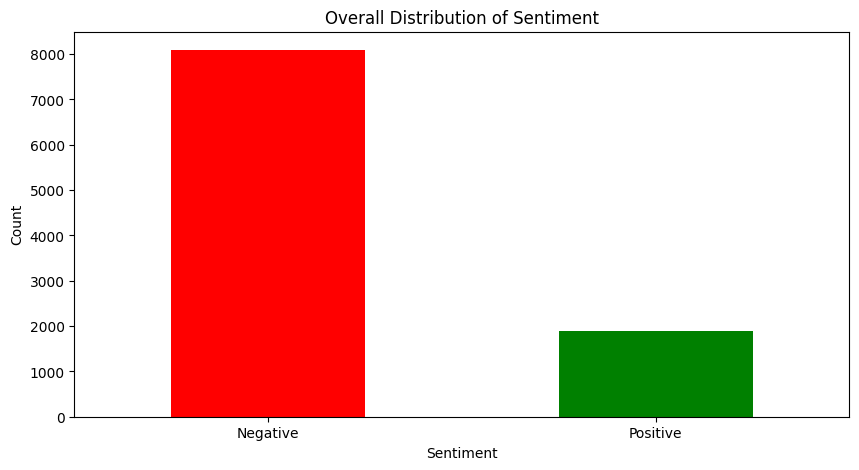

In [8]:
# Use the barplot to understand the overall distribution of sentiment data.
sentiment_count = df['sentiment'].value_counts()
plt.figure(figsize=(10,5))
sentiment_count.plot(kind='bar',color=['red','green'] )
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Overall Distribution of Sentiment')
plt.xticks(ticks=[0,1],labels = ['Negative','Positive'], rotation = 0)
plt.show()


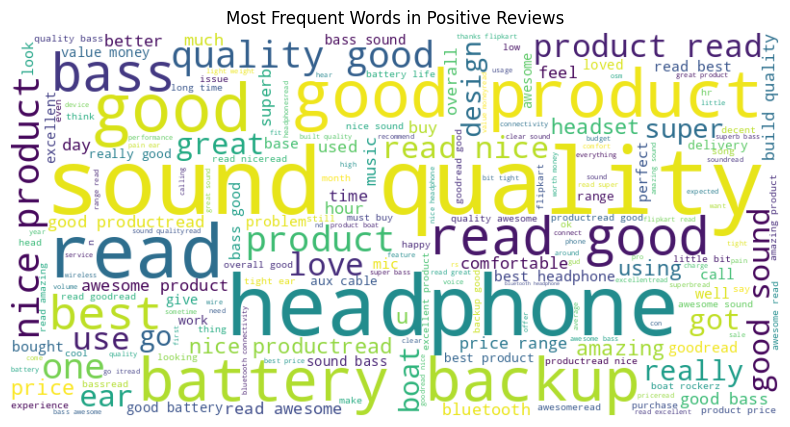

In [9]:
# Use wordcloud to visualize the most frequent words in positive reviews.
positive_reviews = df[df['sentiment'] == 1]['review']
positive_reviews = ' '.join(positive_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Positive Reviews')
plt.show()

In [10]:
# use tf-idf to convert text-reviews to numerical vectors.
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['review']).toarray()
y = df['sentiment']

In [11]:
# Split the data into training and testing part.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# call model and fit the data.
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
# Predict on new data.
y_pred = model.predict(X_test)

In [14]:
# Print accuracy and classification report of the model
from sklearn.metrics import accuracy_score, classification_report
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8547094188376754
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.56      0.58       356
           1       0.91      0.92      0.91      1640

    accuracy                           0.85      1996
   macro avg       0.75      0.74      0.75      1996
weighted avg       0.85      0.85      0.85      1996



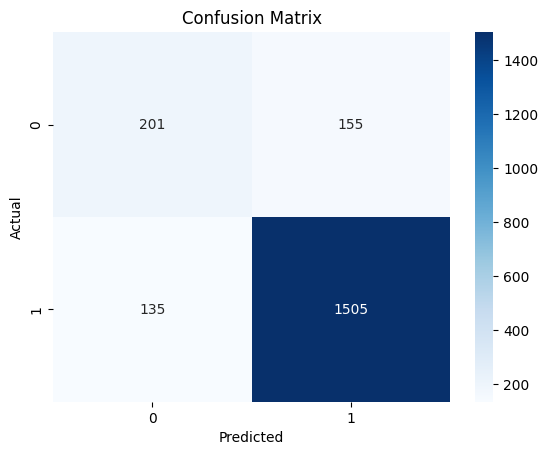

In [15]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()